In [0]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

from keras.callbacks import EarlyStopping

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = np_utils.normalize(X_train, axis=1)
X_test = np_utils.normalize(X_test, axis=1)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

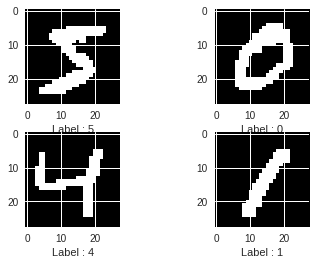

In [17]:
def plot_images(images, labels):
  # Create figure with 2x2 sub-plots.
  fig, axes = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  # plot 4 images
  for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i].reshape([28,28]), cmap=plt.get_cmap('gray'))
    
    # Plot label
    for idx, val in enumerate(labels[i]):
      if(val == 1):
        ax.set_xlabel('Label : %d' % idx)
        
  plt.show()
  
plot_images(X_train[0:4], y_train[0:4])

In [0]:
def plot_history(history,name,metric):
    label_val = 'val_%s' % metric
    
    train = history.history[metric]
    test  = history.history[label_val]

    # Create count of the number of epochs
    epoch_count = range(1, len(train) + 1)

    # Visualize loss history
    plt.plot(epoch_count, train, 'r-')
    plt.plot(epoch_count, test, 'b--')
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epoch')
    plt.ylabel(metric)

    plt.title('%s : %s' % (metric,name))

    plt.show()

In [0]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   mode='auto')

In [0]:
def baseline_model(num_filters, num_units):
  # create model
  model = Sequential()
  
  model.add(Convolution2D(num_filters, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(num_units, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))
  
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

test_filters_8_units_16
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 60s 1ms/step - loss: 0.3580 - acc: 0.8897 - val_loss: 0.1651 - val_acc: 0.9500
Epoch 2/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1832 - acc: 0.9440 - val_loss: 0.1422 - val_acc: 0.9575
Epoch 3/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1585 - acc: 0.9511 - val_loss: 0.1227 - val_acc: 0.9634
Epoch 4/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1437 - acc: 0.9558 - val_loss: 0.1217 - val_acc: 0.9640
Epoch 5/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1328 - acc: 0.9589 - val_loss: 0.1104 - val_acc: 0.9666
Epoch 6/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1231 - acc: 0.9616 - val_loss: 0.1018 - val_acc: 0.9675
Epoch 7/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1134 - acc: 0.96

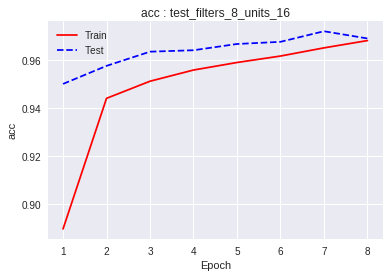

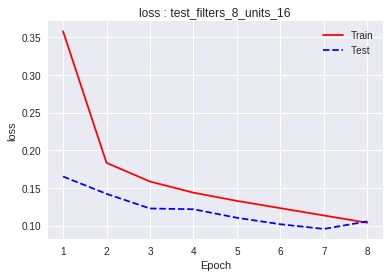

10000/10000 [==============================] - 6s 589us/step
Summary: val_loss: 0.10555530747137964, val_acc: 0.9689
test_filters_8_units_32
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.3292 - acc: 0.8989 - val_loss: 0.1518 - val_acc: 0.9547
Epoch 2/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1620 - acc: 0.9499 - val_loss: 0.1167 - val_acc: 0.9642
Epoch 3/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1258 - acc: 0.9604 - val_loss: 0.1051 - val_acc: 0.9664
Epoch 4/100
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1112 - acc: 0.9645 - val_loss: 0.1032 - val_acc: 0.9694
Epoch 5/100
60000/60000 [==============================] - 59s 982us/step - loss: 0.0982 - acc: 0.9681 - val_loss: 0.1028 - val_acc: 0.9670
Epoch 6/100
60000/60000 [==============================] - 59s 988us/step - loss: 0.0884 - acc: 0.9719 - val_loss: 0.

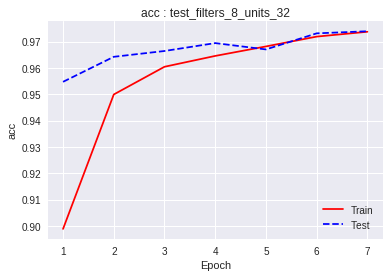

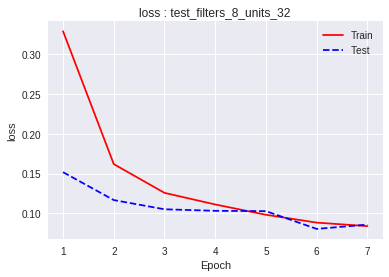

10000/10000 [==============================] - 6s 567us/step
Summary: val_loss: 0.08585824429560453, val_acc: 0.9739
test_filters_8_units_64
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2627 - acc: 0.9200 - val_loss: 0.1123 - val_acc: 0.9650
Epoch 2/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1208 - acc: 0.9623 - val_loss: 0.0844 - val_acc: 0.9735
Epoch 3/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0940 - acc: 0.9702 - val_loss: 0.0751 - val_acc: 0.9761
Epoch 4/100
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0816 - acc: 0.9744 - val_loss: 0.0882 - val_acc: 0.9732
Epoch 00004: early stopping


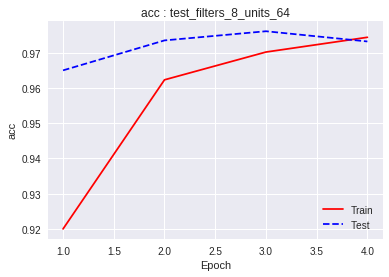

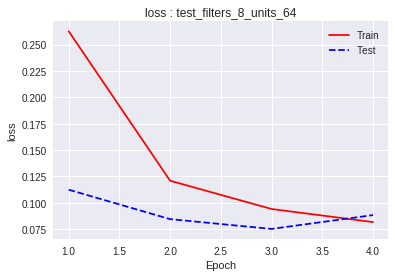

10000/10000 [==============================] - 6s 594us/step
Summary: val_loss: 0.08823023148290814, val_acc: 0.9732
test_filters_16_units_16
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 105s 2ms/step - loss: 0.3819 - acc: 0.8845 - val_loss: 0.1971 - val_acc: 0.9410
Epoch 2/100
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1761 - acc: 0.9471 - val_loss: 0.1254 - val_acc: 0.9615
Epoch 3/100
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1317 - acc: 0.9594 - val_loss: 0.1025 - val_acc: 0.9692
Epoch 4/100
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1113 - acc: 0.9650 - val_loss: 0.0927 - val_acc: 0.9727
Epoch 5/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1009 - acc: 0.9689 - val_loss: 0.0893 - val_acc: 0.9715
Epoch 6/100
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0909 - acc: 0.9712 - val_loss:

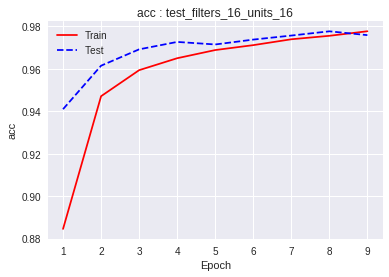

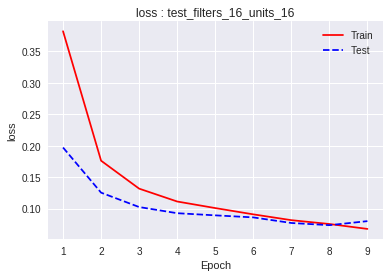

10000/10000 [==============================] - 10s 998us/step
Summary: val_loss: 0.08008326138779522, val_acc: 0.9759
test_filters_16_units_32
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2716 - acc: 0.9170 - val_loss: 0.1204 - val_acc: 0.9638
Epoch 2/100
60000/60000 [==============================] - 106s 2ms/step - loss: 0.1209 - acc: 0.9624 - val_loss: 0.0886 - val_acc: 0.9727
Epoch 3/100
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0928 - acc: 0.9711 - val_loss: 0.0732 - val_acc: 0.9768
Epoch 4/100
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0761 - acc: 0.9758 - val_loss: 0.0696 - val_acc: 0.9786
Epoch 5/100
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0668 - acc: 0.9780 - val_loss: 0.0720 - val_acc: 0.9778
Epoch 00005: early stopping


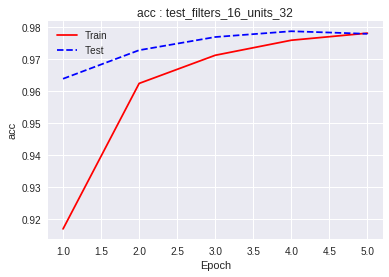

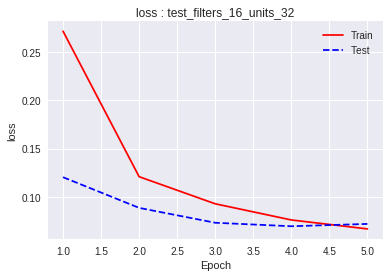

10000/10000 [==============================] - 10s 997us/step
Summary: val_loss: 0.07197188494149595, val_acc: 0.9778
test_filters_16_units_64
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2341 - acc: 0.9276 - val_loss: 0.1136 - val_acc: 0.9653
Epoch 2/100
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1150 - acc: 0.9640 - val_loss: 0.0990 - val_acc: 0.9693
Epoch 3/100
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0827 - acc: 0.9742 - val_loss: 0.0714 - val_acc: 0.9786
Epoch 4/100
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0619 - acc: 0.9811 - val_loss: 0.0690 - val_acc: 0.9765
Epoch 5/100
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0500 - acc: 0.9834 - val_loss: 0.0725 - val_acc: 0.9765
Epoch 00005: early stopping


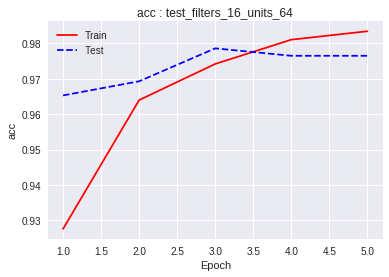

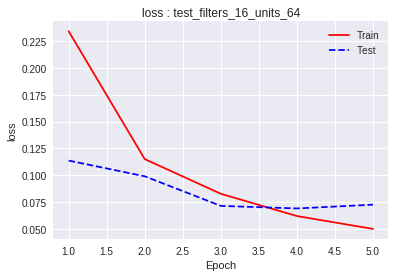

10000/10000 [==============================] - 10s 990us/step
Summary: val_loss: 0.07253502174597233, val_acc: 0.9765
test_filters_32_units_16
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 186s 3ms/step - loss: 0.3095 - acc: 0.9078 - val_loss: 0.1336 - val_acc: 0.9618
Epoch 2/100
60000/60000 [==============================] - 185s 3ms/step - loss: 0.1317 - acc: 0.9605 - val_loss: 0.1036 - val_acc: 0.9663
Epoch 3/100
60000/60000 [==============================] - 187s 3ms/step - loss: 0.1004 - acc: 0.9690 - val_loss: 0.0928 - val_acc: 0.9710
Epoch 4/100
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0842 - acc: 0.9730 - val_loss: 0.0777 - val_acc: 0.9755
Epoch 5/100
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0746 - acc: 0.9761 - val_loss: 0.0816 - val_acc: 0.9739
Epoch 00005: early stopping


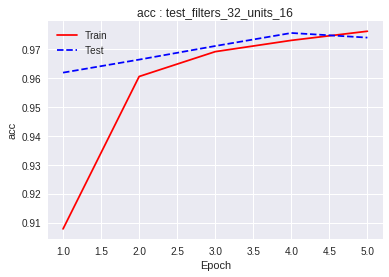

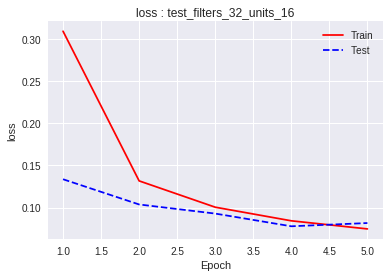

10000/10000 [==============================] - 18s 2ms/step
Summary: val_loss: 0.08158402843661607, val_acc: 0.9739
test_filters_32_units_32
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2677 - acc: 0.9168 - val_loss: 0.1342 - val_acc: 0.9600
Epoch 2/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1166 - acc: 0.9645 - val_loss: 0.0934 - val_acc: 0.9711
Epoch 3/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0905 - acc: 0.9718 - val_loss: 0.0846 - val_acc: 0.9749
Epoch 4/100
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0757 - acc: 0.9764 - val_loss: 0.0794 - val_acc: 0.9749
Epoch 5/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0644 - acc: 0.9794 - val_loss: 0.0770 - val_acc: 0.9750
Epoch 6/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0576 - acc: 0.9817 - val_loss: 

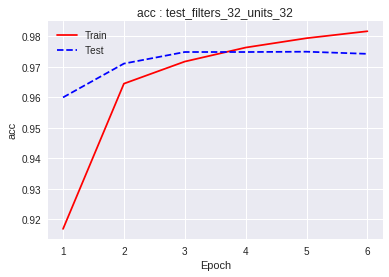

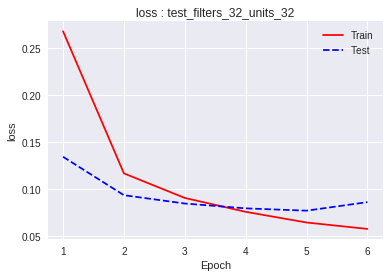

10000/10000 [==============================] - 18s 2ms/step
Summary: val_loss: 0.0860259530538693, val_acc: 0.9743
test_filters_32_units_64
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2220 - acc: 0.9327 - val_loss: 0.1053 - val_acc: 0.9691
Epoch 2/100
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0895 - acc: 0.9722 - val_loss: 0.0772 - val_acc: 0.9771
Epoch 3/100
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0641 - acc: 0.9794 - val_loss: 0.0658 - val_acc: 0.9792
Epoch 4/100
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0495 - acc: 0.9840 - val_loss: 0.0644 - val_acc: 0.9801
Epoch 5/100
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0404 - acc: 0.9869 - val_loss: 0.0691 - val_acc: 0.9786
Epoch 00005: early stopping


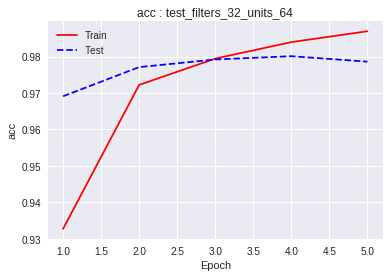

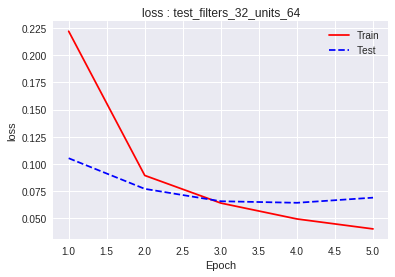

10000/10000 [==============================] - 18s 2ms/step
Summary: val_loss: 0.06907737344814231, val_acc: 0.9786


In [26]:
filters = [8,16,32]
units   = [16,32,64]

for filter in filters:
    for unit in units:
      
        # Name the test model
        name = 'test_filters_{}_units_{}'.format(filter, unit)
        print(name)

        # build the model
        model = baseline_model(filter, unit)
        
        # Fit the model
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=100, batch_size=32, verbose=1, callbacks=[es])
        
        # Plot the history
        plot_history(history,name,'acc')
        plot_history(history,name,'loss')
       
        # Print the summary values
        val_loss, val_acc = model.evaluate(X_test,y_test)
        
        summary = 'Summary: val_loss: {}, val_acc: {}'.format(val_loss, val_acc)
        print(summary)